In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_formats = ['svg']

In [4]:
stores = pd.read_csv("stores data-set.csv")
stores.sample(5)

,Store,Type,Size
4,5,B,34875
44,45,B,118221
2,3,B,37392
27,28,A,206302
3,4,A,205863


In [5]:
features = pd.read_csv("Features data set.csv")
features.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
6807,38,01/07/2011,89.85,3.842,NaN,NaN,NaN,NaN,NaN,129.089400,13.503,False
1592,9,14/09/2012,73.55,3.717,2640.68,NaN,10.75,385.53,4276.03,226.356754,5.277,False
1758,10,25/05/2012,86.03,4.127,7786.58,NaN,712.20,1701.28,3214.55,131.028774,7.382,False
3501,20,03/12/2010,35.47,3.046,NaN,NaN,NaN,NaN,NaN,204.824919,7.484,False
3623,20,05/04/2013,39.50,3.763,17172.30,11206.42,655.74,3383.67,4883.95,217.658844,7.191,False


In [6]:
sales = pd.read_csv("sales data-set.csv")
sales.sample(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
394879,42,49,30/03/2012,35.64,False
328374,34,74,30/09/2011,7980.47,False
35278,4,44,18/03/2011,5378.39,False
400491,43,21,14/10/2011,1549.62,False
102490,11,35,16/04/2010,3441.50,False


In [7]:
features = features.drop(['IsHoliday'],axis='columns')
features.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
3638,20,19/07/2013,77.50,3.737,3738.41,874.45,544.74,966.03,1164.81,NaN,NaN
2011,12,09/04/2010,59.25,3.090,NaN,NaN,NaN,NaN,NaN,126.601903,14.099
7212,40,13/04/2012,40.65,4.025,3668.82,4728.85,34.10,1320.78,1820.75,137.868000,4.125
1019,6,09/03/2012,57.89,3.669,7731.19,445.60,4.19,446.42,5729.67,222.665100,6.132
3585,20,13/07/2012,78.27,3.523,8679.19,99.70,22.34,4960.49,7877.54,214.728027,7.280


In [8]:
df = sales.merge(features, on=('Store','Date')).merge(stores, on='Store')
df.sample(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
252048,26,25,15/07/2011,5878.87,False,64.43,3.827,NaN,NaN,NaN,NaN,NaN,135.783742,7.767,A,152513
339573,35,27,17/08/2012,1545.38,False,76.51,3.807,3038.67,NaN,NaN,1401.93,2672.55,142.215738,8.839,B,103681
351461,37,2,06/01/2012,17148.32,False,57.18,3.157,250.83,1348.24,48.05,NaN,1151.33,218.406288,7.244,C,39910
412377,45,38,19/03/2010,51715.46,False,48.79,2.844,NaN,NaN,NaN,NaN,NaN,182.077986,8.992,B,118221
137392,14,50,17/08/2012,2571.00,False,75.71,3.807,4625.55,62.50,5.84,2100.73,2663.23,191.228492,8.684,A,200898


In [9]:
df.shape

(421570, 16)

In [10]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

df.sample(5).T

,92714,280621,167225,322756,197895
Store,10,29,17,34,21
Dept,35,26,44,94,14
Date,2011-06-17 00:00:00,2011-11-02 00:00:00,2012-10-19 00:00:00,2010-03-09 00:00:00,2010-12-03 00:00:00
Weekly_Sales,7741.64,3456.04,9383.57,33524.99,16727.25
IsHoliday,False,True,False,False,False
Temperature,87.96,28.89,48.16,72.59,57.1
Fuel_Price,3.935,3.255,3.781,2.584,2.667
MarkDown1,NaN,NaN,708.27,NaN,NaN
MarkDown2,NaN,NaN,NaN,NaN,NaN
MarkDown3,NaN,NaN,1.4,NaN,NaN


In [12]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [13]:
df_1 = df[df['Store'] == 1].set_index('Date')

df_1

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-05-02,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-05-02,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-05-02,1,3,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-05-02,1,4,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-05-02,1,5,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,1,94,60278.73,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,A,151315
2012-10-26,1,95,117375.38,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,A,151315
2012-10-26,1,96,36851.92,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,A,151315


In [14]:
df_1.Weekly_Sales

Date
2010-05-02     24924.50
2010-05-02     50605.27
2010-05-02     13740.12
2010-05-02     39954.04
2010-05-02     32229.38
                ...    
2012-10-26     60278.73
2012-10-26    117375.38
2012-10-26     36851.92
2012-10-26     32830.52
2012-10-26     12702.86
Name: Weekly_Sales, Length: 10244, dtype: float64

<AxesSubplot:xlabel='Date'>

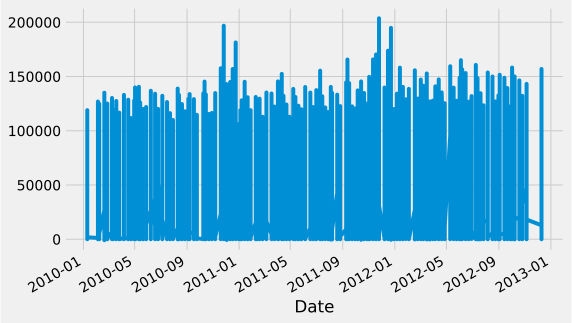

In [15]:
df_1.Weekly_Sales.plot()

In [16]:
df_store_1_dept_1 = df[(df['Store'] == 1)  & (df['Dept'] ==1)].set_index('Date')

df_store_1_dept_1

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-05-02,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-12-02,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2010-02-19,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
2010-02-26,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
2010-05-03,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1,1,18947.81,False,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,A,151315
2012-05-10,1,1,21904.47,False,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,223.181477,6.573,A,151315
2012-12-10,1,1,22764.01,False,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,A,151315


<AxesSubplot:xlabel='Date'>

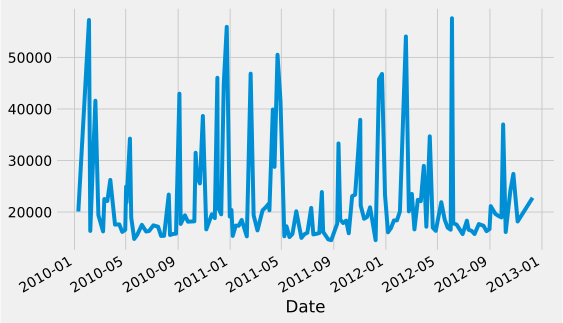

In [17]:
df_store_1_dept_1.Weekly_Sales.plot()

<AxesSubplot:xlabel='Date'>

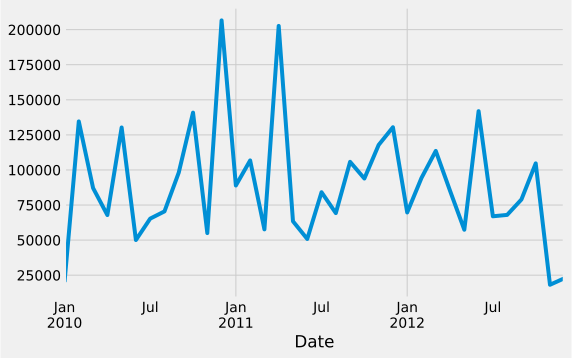

In [18]:
df_store_1_dept_1.resample('1m').Weekly_Sales.sum().plot()

In [19]:
sales_by_store_and_date = df.groupby(['Store','Date']).Weekly_Sales.sum().to_frame()

sales_by_store_and_date

Weekly_Sales
Store Date                    
1     2010-01-10    1453329.50
      2010-02-04    1594968.28
      2010-02-07    1492418.14
      2010-02-19    1611968.17
      2010-02-26    1409727.59
...                        ...
45    2012-10-08     733037.32
      2012-10-19     718125.53
      2012-10-26     760281.43
      2012-11-05     770487.37
      2012-12-10     734464.36

[6435 rows x 1 columns]

In [20]:
sales_by_store_and_date.reset_index()

,Store,Date,Weekly_Sales
0,1,2010-01-10,1453329.50
1,1,2010-02-04,1594968.28
2,1,2010-02-07,1492418.14
3,1,2010-02-19,1611968.17
4,1,2010-02-26,1409727.59
...,...,...,...
6430,45,2012-10-08,733037.32
6431,45,2012-10-19,718125.53
6432,45,2012-10-26,760281.43
6433,45,2012-11-05,770487.37


In [21]:
t_df = sales_by_store_and_date.reset_index().set_index('Date')
t_df = t_df[t_df['Store']==1]
t_df

,Store,Weekly_Sales
Date,,
2010-01-10,1,1453329.50
2010-02-04,1,1594968.28
2010-02-07,1,1492418.14
2010-02-19,1,1611968.17
2010-02-26,1,1409727.59
...,...,...
2012-10-08,1,1592409.97
2012-10-19,1,1508068.77
2012-10-26,1,1493659.74


<AxesSubplot:xlabel='Date'>

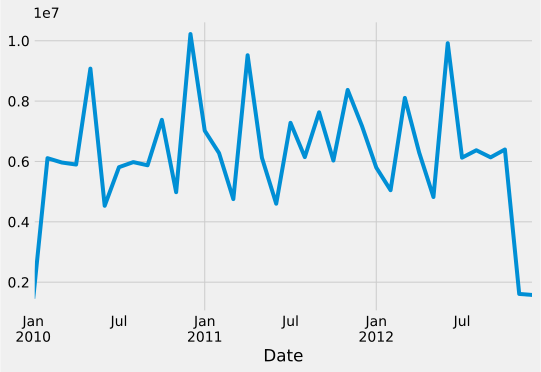

In [22]:
t_df.resample('1m').Weekly_Sales.sum().plot()

In [23]:
df.groupby('IsHoliday')['Weekly_Sales'].agg(['sum','mean']) / 1e6

,sum,mean
IsHoliday,,
False,6231.919436,0.015901
True,505.299552,0.017036


In [24]:
df_1 = df[df['Store'] == 1].groupby(['Store','Date','Temperature']).Weekly_Sales.sum().to_frame().reset_index()

df_1['month'] = df_1.Date.dt.month
df_1 

,Store,Date,Temperature,Weekly_Sales,month
0,1,2010-01-10,71.89,1453329.50,1
1,1,2010-02-04,62.27,1594968.28,2
2,1,2010-02-07,80.91,1492418.14,2
3,1,2010-02-19,39.93,1611968.17,2
4,1,2010-02-26,46.63,1409727.59,2
...,...,...,...,...,...
138,1,2012-10-08,85.05,1592409.97,10
139,1,2012-10-19,67.97,1508068.77,10
140,1,2012-10-26,69.16,1493659.74,10
141,1,2012-11-05,73.77,1611096.05,11


<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

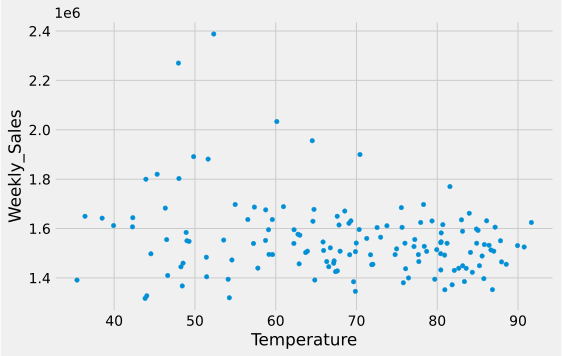

In [25]:
df_1.plot.scatter(x ='Temperature' ,y = 'Weekly_Sales')

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

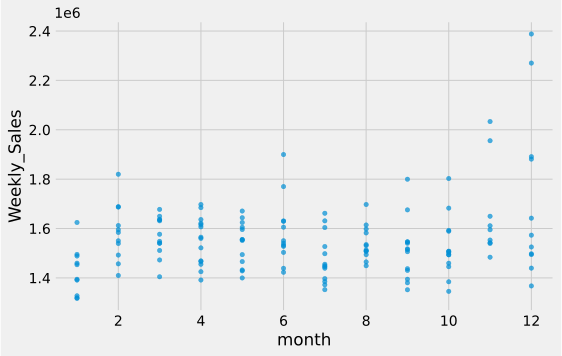

In [26]:
df_1.plot.scatter(x ='month' ,y = 'Weekly_Sales' ,alpha=0.7)

In [27]:
corr_df = df.corr()
corr_df 

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673
MarkDown2,-0.035173,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827
MarkDown3,-0.031556,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913
MarkDown4,-0.009941,0.004257,0.045414,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196


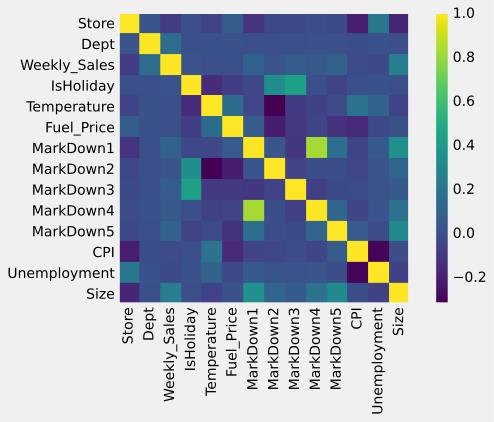

In [28]:
plt.imshow(corr_df)
plt.grid(None)

plt.colorbar()
plt.xticks(range(len(corr_df.columns)), corr_df.columns, rotation=90)
_ = plt.yticks(range(len(corr_df.columns)), corr_df.columns)


# simple machine learning example

In [37]:
t_df = df[df.Weekly_Sales > 0].copy()

train_df = t_df.set_index('Date').loc[:'2011']
train_df.tail(5)


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2011-12-30,45,93,1426.52,True,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,B,118221
2011-12-30,45,94,2979.03,True,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,B,118221
2011-12-30,45,95,42084.36,True,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,B,118221
2011-12-30,45,97,5569.82,True,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,B,118221
2011-12-30,45,98,553.21,True,37.79,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,B,118221


In [38]:
test_df = t_df.set_index('Date').loc['2012':]
test_df

<ipython-input-38-923e4950c1e9>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  test_df = t_df.set_index('Date').loc['2012':]


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2012-06-01,1,1,16567.69,False,49.01,3.157,6277.39,21813.16,143.1,1450.13,8483.00,219.714258,7.348,A,151315
2012-06-01,1,2,44481.38,False,49.01,3.157,6277.39,21813.16,143.1,1450.13,8483.00,219.714258,7.348,A,151315
2012-06-01,1,3,13926.04,False,49.01,3.157,6277.39,21813.16,143.1,1450.13,8483.00,219.714258,7.348,A,151315
2012-06-01,1,4,40925.76,False,49.01,3.157,6277.39,21813.16,143.1,1450.13,8483.00,219.714258,7.348,A,151315
2012-06-01,1,5,23105.81,False,49.01,3.157,6277.39,21813.16,143.1,1450.13,8483.00,219.714258,7.348,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,45,93,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
2012-10-26,45,94,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
2012-10-26,45,95,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [39]:
numeric_variables = ['Temperature', 'IsHoliday', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size']

train_df[numeric_variables].fillna(0)

,Temperature,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Date,,,,,,,,,,,
2010-05-02,42.31,False,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,151315
2010-05-02,42.31,False,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,151315
2010-05-02,42.31,False,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,151315
2010-05-02,42.31,False,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,151315
2010-05-02,42.31,False,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,151315
...,...,...,...,...,...,...,...,...,...,...,...
2011-12-30,37.79,True,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,118221
2011-12-30,37.79,True,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,118221
2011-12-30,37.79,True,3.389,3604.35,43941.56,287.45,357.43,750.01,189.062016,8.523,118221


In [40]:

from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['Store', 'Dept', 'Type']
encoder = OneHotEncoder()
encoder.fit(train_df[categorical_variables])

cat_values = encoder.transform(train_df[categorical_variables]).todense()
cat_values

matrix([[1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

In [41]:
pd.DataFrame(cat_values, columns=encoder.get_feature_names())

,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_9,x0_10,...,x1_93,x1_94,x1_95,x1_96,x1_97,x1_98,x1_99,x2_A,x2_B,x2_C
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
293200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
293201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
293202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

scaler = StandardScaler()
encoder = OneHotEncoder()

scaler.fit(train_df[numeric_variables])
encoder.fit(train_df[categorical_variables])

def get_features(df):
    numeric_values = scaler.transform(df[numeric_variables].fillna(0))
    categorical_values = encoder.transform(df[categorical_variables]).todense()
    return np.hstack([numeric_values, categorical_values])


X_train = get_features(train_df)
X_test = get_features(test_df)

y_train = train_df.Weekly_Sales.apply(np.log1p)
y_test = test_df.Weekly_Sales.apply(np.log1p)

<AxesSubplot:ylabel='Frequency'>

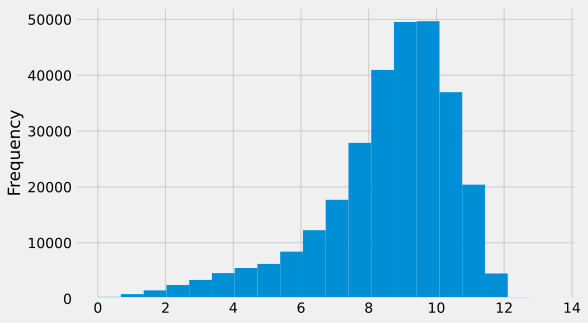

In [44]:
y_train.plot.hist(bins= 20)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor


baseline = DummyRegressor()
model    = LinearRegression()


In [49]:
model.fit(X_train,y_train)

LinearRegression()

In [51]:
baseline.fit(X_train,y_train)

DummyRegressor()

In [54]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error

model_pred = model.predict(X_test)
baseline_pred = baseline.predict(X_test)

mean_squared_error(y_test,model_pred)

1.342197914404629

In [55]:
mean_absolute_error(y_test,model_pred)

0.728674999815002

In [56]:
mean_absolute_error(y_test,baseline_pred)

1.5423440780489512